# **Calls Network**

In [41]:
import pandas as pd
import numpy as np 
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
calls_file = "calls.csv"
genders_file = "genders.csv"

# **Nodes**

In [31]:
gender_df = pd.read_csv(genders_file)
gender_df.head()

,# user,female
0,0,0
1,2,0
2,3,0
3,4,0
4,5,0


In [32]:
gender_df = gender_df.rename(columns={'# user' : 'user'})

In [33]:
gender_df['female'].value_counts()

0    614
1    173
Name: female, dtype: int64

([<matplotlib.patches.Wedge at 0x15e74223790>,
 [Text(-0.7006926077430178, -0.8479562898253008, 'male'),
  Text(0.7643919357196559, 0.9250432252639644, 'female')],
 [Text(-0.38219596785982785, -0.4625216126319822, '78.0%'),
  Text(0.4458952958364659, 0.5396085480706458, '22.0%')])

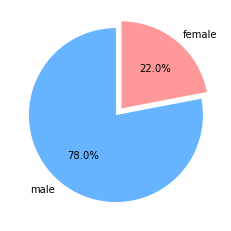

In [37]:
plt.pie(x=gender_df['female'].value_counts() ,
               explode=(0, 0.1), labels = ['male','female'],
               colors=['#66b3ff','#ff9999'],autopct='%1.1f%%',startangle=90)

# Edges

In [38]:
calls_df = pd.read_csv(calls_file)
calls_df

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5
...,...,...,...,...
3595,2414934,706,401,78
3596,2415585,218,382,48
3597,2416059,561,631,13
3598,2416368,323,392,4


**Cleaning the data**

when the duration of the call is -1, then this means the receiver did not pick up the phone, we can keep it, but when
we calculate the average duration, we should not add it to the calculation.

In [ ]:
nodes = gender_df['user'].to_list() # list of all nodes
calls_edges = [tuple(e) for e in zip(calls_df['caller'].to_list(), calls_df['callee'].to_list())] # list of all edges

# **The average interactions between:**
 - Females to Females
 - Females to Males

In [39]:
female_counter = 0 
male_counter = 0
counter = 0
avg_duration_m = 0
avg_duration_f = 0
sum_m = 0
sum_f = 0
for i,row in calls_df.iterrows():
    caller =row['caller']
    receiver = row['callee']
    #print(caller)
    #new_gender_df.loc[new_gender_df['Id'] == caller,'female'].item()
    
    if caller in gender_df['user'].to_list() and receiver in gender_df['user'].to_list():
         if gender_df.loc[gender_df['user']==caller,'female'].item() == 0:
                counter += 1
                if gender_df.loc[gender_df['user']==receiver,'female'].item() == 0:
                    female_counter += 1
                    if row['duration']>0:
                        sum_f += row['duration']
                if gender_df.loc[gender_df['user']==receiver,'female'].item() == 1:
                    male_counter += 1
                    if row['duration']>0:
                        sum_m += row['duration']
print("Number of calls made by a female is " + str(counter))   
print("Number of calls received by a female is " + str(female_counter)) 
print("Number of calls received by a male is " + str(male_counter))

Number of calls made by a female is 2532
Number of calls received by a female is 1955
Number of calls received by a male is 577


Plotting the percentages of calls made by a female to a male and to a female

([<matplotlib.patches.Wedge at 0x15e75332fd0>,
 [Text(-0.7219395834466379, 0.8299417075029397, 'male'),
  Text(0.7875704546690593, -0.9053909536395708, 'female')],
 [Text(-0.3937852273345297, 0.4526954768197852, '22.8%'),
  Text(0.45941609855695126, -0.5281447229564162, '77.2%')])

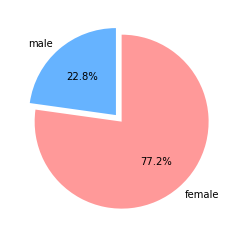

In [43]:
y = np.array([male_counter,female_counter])

plt.pie(x= y,
               explode=(0, 0.1), labels = ['male','female'],
               colors=['#66b3ff','#ff9999'],autopct='%1.1f%%',startangle=90)

**Calculating the Average call duration:**
    

- In general 

In [45]:
print((sum_f+sum_m) / (female_counter+ male_counter))

59.485781990521325


- average call duration to a male

In [46]:
avg_duration_m = sum_m/ male_counter
print(avg_duration_m)

96.81802426343154


- average call duration to a female

In [47]:
avg_duration_f = sum_f / female_counter
print(avg_duration_f)

48.46751918158568


As we can see even though females are more likely to call a female, call to a male tend be longer than calls to a female by half a minute

# The average interaction between:
 - Males to Males
 - Males to females

In [48]:
female_counter = 0 
male_counter = 0
counter = 0
sum_m = 0
sum_f = 0
for i,row in calls_df.iterrows():
    caller =row['caller']
    receiver = row['callee']
    #print(caller)
    
    if caller in gender_df['user'].to_list() and receiver in gender_df['user'].to_list():
         if  gender_df.loc[gender_df['user']==caller,'female'].item() == 1:
                counter += 1
                if gender_df.loc[gender_df['user']==receiver,'female'].item()== 0:
                    female_counter += 1
                    if row['duration']>0:
                        sum_f += row['duration']
                if gender_df.loc[gender_df['user']==receiver,'female'].item() == 1:
                    male_counter += 1
                    if row['duration']>0:
                        sum_m += row['duration']
print("Number of calls made by a male is " + str(counter))   
print("Number of calls received by a female is " + str(female_counter)) 
print("Number of calls received by a male is " + str(male_counter)) 

Number of calls made by a male is 853
Number of calls received by a female is 581
Number of calls received by a male is 272


# clustering coefficient

In [60]:
def df_sub_period(period,df):
    for i,row in df.iterrows():
        if row['timestamp']>period:
            df = df.drop(i)
    return df

to calculate the clustring coefficient we need an undirected graph

In [61]:
def create_graph(df):
    nodes = gender_df['user'].to_list() # list of all nodes
    edges = [tuple(e) for e in zip(df['caller'].to_list(), df['callee'].to_list())] # list of all edges
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

a week is seconds is 3600 * 24 * 7 which is 604,800 seconds

In [62]:
def weekly_graph(week,df):
    period = week * 3600 * 24
    sub_df = df_sub_period(period, df)
    G = create_graph(sub_df)
    return G
    

In [64]:
females = []
males = []
for i,row in gender_df.iterrows():
    if row['female'] == 1:
        females.append(row['user'])
    else:
        males.append(row['user'])

In [159]:
def clustring_plt(clustring_coe,gender):   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    weeks = ['one week', 'two weeks', 'three weeks', 'four weeks']
    ax.bar(weeks,clustring_coe)
    ax.set_title("Average Clustering Coefficient "+gender+" of Students in Calls Network")
    ax.set_ylabel('average value')
    ax.set_xlabel('weeks')
    plt.show()

# Females

In [160]:
def results(nodes):    
    G = weekly_graph(7, calls_df)

    first_week = nx.average_clustering(G,nodes)

    G = weekly_graph(14, calls_df)

    second_week = nx.average_clustering(G,nodes)

    G = weekly_graph(21, calls_df)

    third_week = nx.average_clustering(G,nodes)

    G = weekly_graph(28, calls_df)

    fourth_week = nx.average_clustering(G,nodes)
    
    clustring_coe = [first_week,second_week,third_week,fourth_week]
    return clustring_coe

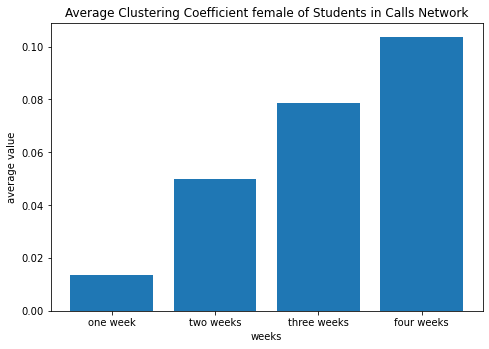

In [161]:
gender = 'female'
clustring_plt(results(females),gender)

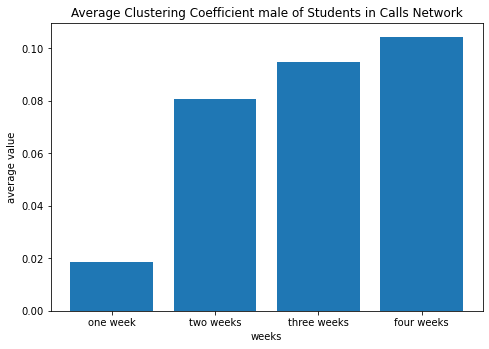

In [162]:
gender = 'male'
clustring_plt(results(males),gender)

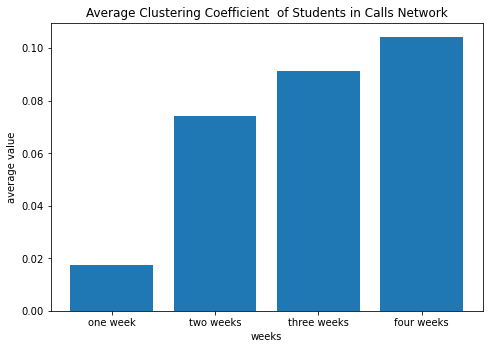

In [163]:
clustring_plt(results(gender_df['user']),"")

# Triangles:

In [135]:

def get_triangles(G):
    result = []
    list =[]
    nodes = G.nodes()
    for n1 in nodes:
        neighbors1 = set(G[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(G[n2])
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                result.append(n1)
                result.append(n2)
                result.append(n3)
                list.append(result)
                #yield n1, n2, n3
    return list

In [136]:
G = create_graph(calls_df)
generator = get_triangles(G)


In [130]:
all_cliques= nx.enumerate_all_cliques(G)

In [131]:
triad_cliques=[x for x in all_cliques if len(x)==3 ]

for each triangle, find if it's a homophilly or a hetrophilly, 

In [155]:

def tri(triad_cliques):
    female_homo =0
    male_homo = 0
    male_hetro =0
    female_hetro=0
    for tri in triad_cliques:
        female_count = 0
        male_count = 0
        for node in tri:
            if node in gender_df['user'].to_list():
                if gender_df.loc[gender_df['user'] == node,'female'].item() == 0:
                    male_count += 1
                else:
                    female_count += 1
        if male_count == 0:
            female_homo += 1
        elif female_count == 0:
            male_homo +=1
        elif female_count > male_count and male_count!=0:
            female_hetro += 1
        elif male_count> female_count and female_count!=0:
            male_hetro += 1
#         print(tri)
#         print("females: "+str(female_count))
#         print("males: "+str(male_count))
    print("female homophilly: "+str(female_homo))
    print("male homophilly: "+str(male_homo))
    print("male hetrophilly: "+str(male_hetro))
    print("female hetrophilly: "+str(female_hetro))
    return female_homo, female_hetro, male_homo, male_hetro

In [156]:
tri(triad_cliques)

female homophilly: 5
male homophilly: 57
male hetrophilly: 31
female hetrophilly: 10


(5, 10, 57, 31)

In [157]:
def tri_plt(tri):   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    group = ['Females only', '2 Females, 1 Male', 'Males only', '2 Males, 1 Female']
    ax.bar(group,tri)
    ax.set_title("Gender in Triangles formed in calls Network")
    ax.set_ylabel('count')
    ax.set_xlabel('group')
#     for index, value in enumerate(clustring_coe):
#         plt.text(value, index, str(value))
    plt.show()

female homophilly: 5
male homophilly: 57
male hetrophilly: 31
female hetrophilly: 10


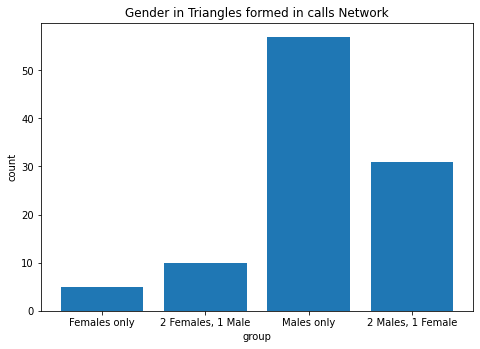

In [158]:
tri_plt(tri(triad_cliques))